In [14]:
import pyodbc

try:
    conn = pyodbc.connect(
        r'DRIVER={SQL Server};'
        r'SERVER=DESKTOP-AQCN1RO,1433;'  # הוספת הפורט אחרי פסיק
        r'DATABASE=Recommendations;'
        r'Trusted_Connection=yes;'
    )
    print("✅ החיבור לשרת הצליח!")

except Exception as e:
    print("❌ שגיאה:", e)




✅ החיבור לשרת הצליח!


In [25]:
import pandas as pd

query = "SELECT TOP 5 * FROM Recommendations"
df = pd.read_sql(query, conn)

print("🔍 מספר שורות שהוחזרו:", len(df))
print(df.head())  # נציג 5 שורות ראשונות


🔍 מספר שורות שהוחזרו: 3
   RecommendationID  CustomerID  ProductID  \
0                 1          11          1   
1                 2          13          1   
2                 3          13          2   

                  RecommendationReason               CreatedAt  
0  Similar product purchased by others 2025-02-18 15:01:02.153  
1  Similar product purchased by others 2025-02-18 15:11:42.730  
2  Similar product purchased by others 2025-02-18 15:11:42.730  


C:\Users\shaha\AppData\Local\Temp\ipykernel_35848\1286890608.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


C:\Users\shaha\AppData\Local\Temp\ipykernel_35848\2998368354.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ProductID", y="TotalRecommendations", data=product_recommendations, palette="Blues_r")


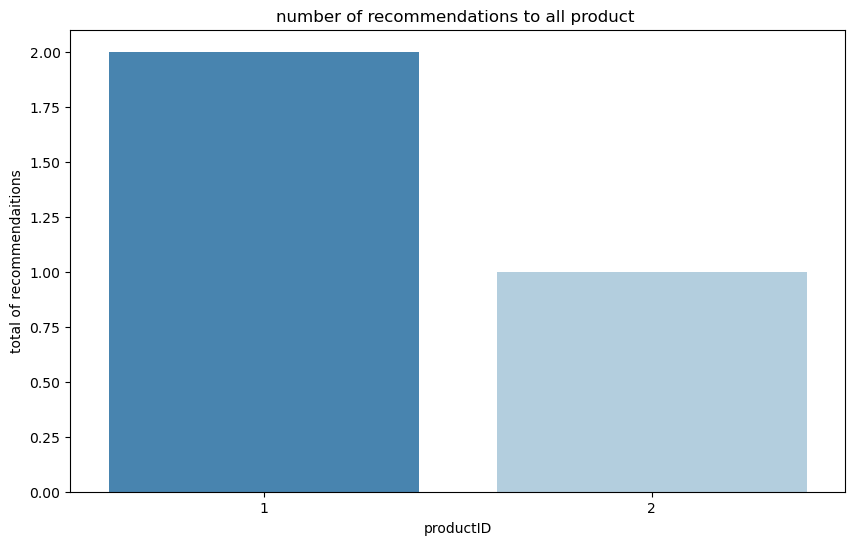

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# נספור כמה המלצות יש לכל מוצר
product_recommendations = df["ProductID"].value_counts().reset_index()
product_recommendations.columns = ["ProductID", "TotalRecommendations"]

# יצירת גרף עמודות
plt.figure(figsize=(10, 6))
sns.barplot(x="ProductID", y="TotalRecommendations", data=product_recommendations, palette="Blues_r")
plt.xlabel("productID")
plt.ylabel("total of recommendaitions")
plt.title("number of recommendations to all product ")
plt.show()


C:\Users\shaha\AppData\Local\Temp\ipykernel_35848\1371001390.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_orders = pd.read_sql(query, conn)


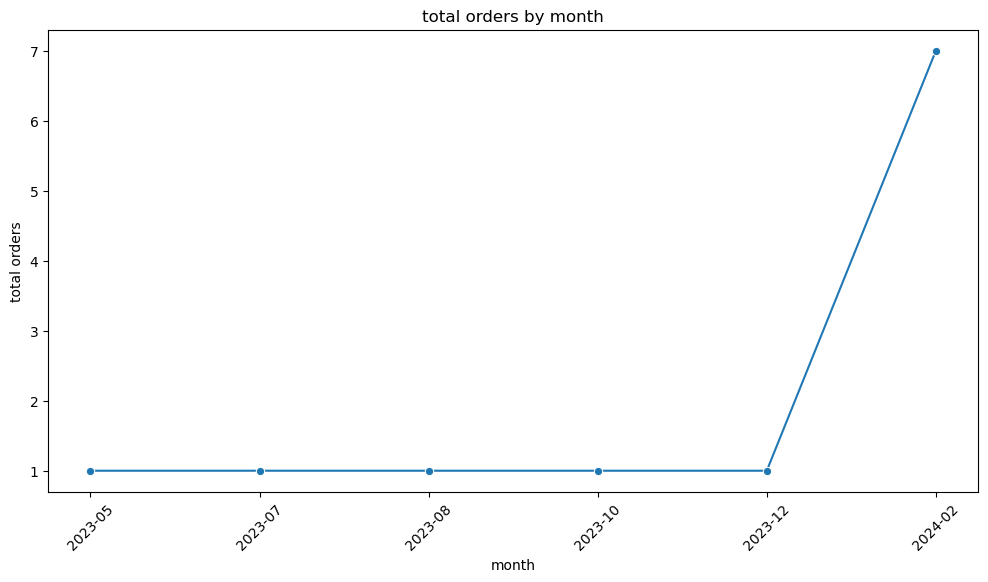

In [35]:
query = """
SELECT FORMAT(OrderDate, 'yyyy-MM') AS OrderMonth, COUNT(OrderID) AS TotalOrders
FROM Orders
GROUP BY FORMAT(OrderDate, 'yyyy-MM')
ORDER BY OrderMonth;
"""

df_orders = pd.read_sql(query, conn)

# הצגת גרף קו
plt.figure(figsize=(12, 6))
sns.lineplot(x="OrderMonth", y="TotalOrders", data=df_orders, marker="o")
plt.xlabel("month")
plt.ylabel("total orders")
plt.title("total orders by month")
plt.xticks(rotation=45)
plt.show()


C:\Users\shaha\AppData\Local\Temp\ipykernel_35848\4154125666.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rfm = pd.read_sql(query, conn)


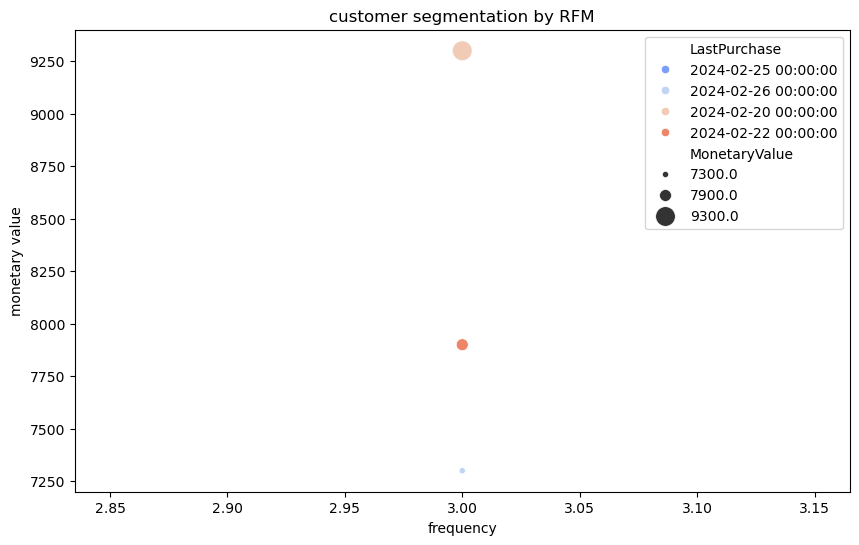

In [37]:
query = """
SELECT CustomerID, 
       COUNT(OrderID) AS Frequency, 
       MAX(OrderDate) AS LastPurchase, 
       SUM(TotalAmount) AS MonetaryValue
FROM Orders
GROUP BY CustomerID
"""

df_rfm = pd.read_sql(query, conn)

# המרת התאריך לטיפוס מתאים
df_rfm["LastPurchase"] = pd.to_datetime(df_rfm["LastPurchase"])

# הצגת פילוח עם Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_rfm, x="Frequency", y="MonetaryValue", hue="LastPurchase", palette="coolwarm", size="MonetaryValue", sizes=(20, 200))
plt.xlabel("frequency")
plt.ylabel("monetary value")
plt.title("customer segmentation by RFM")
plt.show()
